# Explore the Data

## 1. Import Data & Libs

In [31]:
import models
import data_processing
from datetime import date
import pandas as pd
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib auto

In [27]:
df = data_processing.import_process_df("./pickles/all_matches.pkl")

In [28]:
df_matches = df[df['Gender'].apply(lambda x: x.lower()) == 'women']
df_matches = df_matches[df_matches['Tour'].apply(lambda x: x.lower()) == 'wta']
df_matches = df_matches[df_matches['Single/Doubles'].apply(lambda x: x.lower()) == 'singles']

In [29]:
plot_data = df_matches.groupby(['favorite_odd','favorite_won']).agg({'Name':'count'})

plot_data = plot_data.reset_index()
combs = pd.DataFrame(list(product(plot_data['favorite_odd'].unique(), plot_data['favorite_won'].unique())),  columns=['favorite_odd', 'favorite_won'])
plot_data = plot_data.merge(combs, how = 'right').fillna(0)
plot_data = plot_data.set_index(['favorite_odd','favorite_won'])
plot_data = plot_data.groupby(['favorite_odd'], as_index=True).apply(lambda x: x / x.sum())

plot_data = plot_data.query('favorite_won == 1')
plot_data = plot_data.rename(columns={"Name":"probability"})
plot_data = plot_data.reset_index()
plot_data = plot_data[['favorite_odd','probability']]

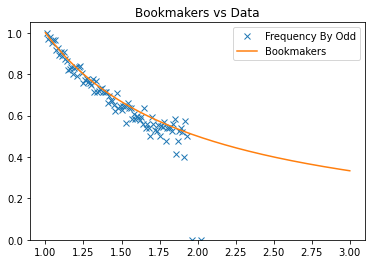

In [32]:
x_data = np.linspace(1,3,200)
f = lambda x: 1/x
y_data = f(x)

x_real = plot_data['favorite_odd']
y_real = plot_data['probability']

plt.plot(x_real, y_real,'x',label = 'Frequency By Odd')
plt.plot(x_data,y_data, label = 'Bookmakers')
plot_title = "Bookmakers vs Data"
plt.title(plot_title)
plt.legend()
plt.ylim(0, 1.05)
plt.show()